# 7.1. Importing required libraries and loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

In [2]:
electronics_df = pd.read_csv('ratings_Electronics.csv', header = None, names = ['userID', 'productID',
                                                                                'rating','timestamp'])

In [3]:
electronics_df.head()

,userID,productID,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
# Since time stamp can be ignored for the purpose, dropping the same
electronics_df.drop('timestamp', axis =1, inplace = True)

# 7.2. Exploring Data 

In [5]:
electronics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userID       object
productID    object
rating       float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


Dataset has three columns with the information on users, products and ratings provided by the user. Data type for rating is 'float64' which means there are no non-numeric values present in the rating. Data is clean to proceed further.

In [6]:
electronics_df.shape

(7824482, 3)

In [7]:
electronics_df.isnull().sum()

userID       0
productID    0
rating       0
dtype: int64

In [8]:
electronics_df.nunique()

userID       4201696
productID     476002
rating             5
dtype: int64

There are 7.82 million records spreading across 3 features. 
There are no missing values in the dataset.
We can observe there are 476K unique products rated by 4.2 million unique users.

In [9]:
sorted(electronics_df['rating'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0]

Since all the ratings range from 1 to 5 without any decimals in place, we can change the data type to int32 to reduce the memory usage.

In [10]:
#electronics_df['rating'] = electronics_df['rating'].astype('int16')

In [11]:
electronics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userID       object
productID    object
rating       float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [12]:
sorted(electronics_df['rating'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0]

Ratings varies from 1 to 5 with 5 being the best and 1 being the worst. There are no products with rating missing i.e., rating euals to zero (0).

In [13]:
electronics_df.groupby('rating')['productID'].count()

rating
1.0     901765
2.0     456322
3.0     633073
4.0    1485781
5.0    4347541
Name: productID, dtype: int64

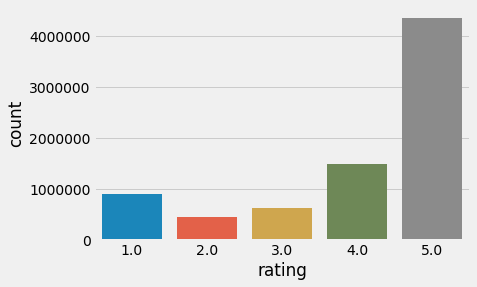

In [14]:
plt.style.use('fivethirtyeight')
sns.countplot(data = electronics_df, x = 'rating')

Users rated products as 5 for more than 50% times followed by ratings of 4 & 1 respectively. The least rating provided is 2 for about 10% times.

In [15]:
electronics_df.groupby('productID')['rating'].count().nlargest(25)

productID
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
B008OHNZI0     8966
B003LR7ME6     8840
B000LRMS66     8715
B009SYZ8OC     8370
B00BGA9WK2     7561
B004QK7HI8     7060
B009A5204K     7059
B00BGGDVOO     6893
B0098F5W0Q     6616
B002MAPRYU     6599
B002WE6D44     6509
B005HMKKH4     6134
B0012S4APK     5642
B0052YFYFK     5521
B0001FTVEK     5345
Name: rating, dtype: int64

We can see Top 25 products mostly rated. The rating can be anything from 1 to 5 but these are mostly rated by users.

In [16]:
# These are the least rated products. All of these are rated by only one user.
electronics_df.groupby('productID')['rating'].count().nsmallest(25)

productID
0132793040    1
0321732944    1
0558835155    1
0594017343    1
0594017580    1
0594202442    1
0594287995    1
0594450705    1
0594478162    1
0594482127    1
0594514789    1
0594549507    1
0594549558    1
0840017677    1
094339676X    1
0977703037    1
0986987662    1
1085901386    1
134048160X    1
1348510390    1
1412789788    1
1575839415    1
1594243034    1
1600775160    1
1604550945    1
Name: rating, dtype: int64

In [17]:
summary = electronics_df.pivot_table(columns = 'rating', index = 'productID', values = 'userID', 
                                     aggfunc = 'count', fill_value = 0)
summary

rating,1.0,2.0,3.0,4.0,5.0
productID,,,,,
0132793040,0,0,0,0,1
0321732944,0,0,0,0,1
0439886341,2,0,1,0,0
0511189877,0,1,0,0,5
0528881469,9,5,1,5,7
0558835155,0,0,1,0,0
059400232X,0,0,0,0,3
0594012015,6,0,0,0,2
0594017343,1,0,0,0,0


In [18]:
top_rated_products = electronics_df[electronics_df['rating']>3]

In [19]:
top_rated_products.nunique()

userID       3256144
productID     410110
rating             2
dtype: int64

In [20]:
top_rated_products.groupby('rating')['productID'].count()

rating
4.0    1485781
5.0    4347541
Name: productID, dtype: int64

In [21]:
# Top 25 products rated as 4 or 5
top_rated_products.groupby('productID')['rating'].count().nlargest(25)

productID
B0074BW614    16098
B007WTAJTO    12244
B0019EHU8G    11640
B00DR0PDNE    11604
B006GWO5WK    10048
B003ELYQGG     9868
B003ES5ZUU     9653
B007R5YDYA     9257
B00622AG6S     8502
B000LRMS66     8321
B0002L5R78     8199
B003LR7ME6     7846
B008OHNZI0     7312
B009SYZ8OC     6577
B00BGA9WK2     5814
B00BGGDVOO     5802
B002WE6D44     5710
B009A5204K     5339
B0098F5W0Q     5337
B005HMKKH4     5240
B004QK7HI8     5112
B002MAPRYU     4765
B00316263Y     4763
B0012S4APK     4739
B0052YFYFK     4582
Name: rating, dtype: int64

In [22]:
# Least 25 products rated as 4 or 5
top_rated_products.groupby('productID')['rating'].count().nsmallest(25)

productID
0132793040    1
0321732944    1
0594202442    1
0594287995    1
0594450705    1
0594478162    1
0594482127    1
0594514789    1
0594549507    1
0594549558    1
0743610431    1
0840017677    1
089933623X    1
0899336795    1
094339676X    1
0970408005    1
0977703037    1
0978770382    1
0986987662    1
1094441252    1
134048160X    1
1412789788    1
1575839415    1
1594243034    1
1604550945    1
Name: rating, dtype: int64

# 7.3. Reducing Data Sparsity

In [6]:
rating_counts = electronics_df['userID'].value_counts()
atleast_100_ratings = electronics_df[electronics_df['userID'].isin(rating_counts[rating_counts > 99].index)]

In [7]:
atleast_100_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44209 entries, 118 to 7824444
Data columns (total 3 columns):
userID       44209 non-null object
productID    44209 non-null object
rating       44209 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ MB


To build better recommnedation model, considering only the users who has rated atleast 50 products. After doing the same, dataset is reducted to 126K records. Let's proceed further.

In [8]:
atleast_100_ratings.head()

,userID,productID,rating
118,AT09WGFUM934H,0594481813,3.0
178,A17HMM1M7T9PJ1,0970407998,4.0
631,A3TAS1AG6FMBQW,0972683275,5.0
1777,A18S2VGUH9SCV5,1400501776,4.0
2162,A5JLAU2ARJ0BO,1400532655,1.0


In [9]:
atleast_100_ratings.groupby('rating')['productID'].count()

rating
1.0     1535
2.0     1760
3.0     4218
4.0    11990
5.0    24706
Name: productID, dtype: int64

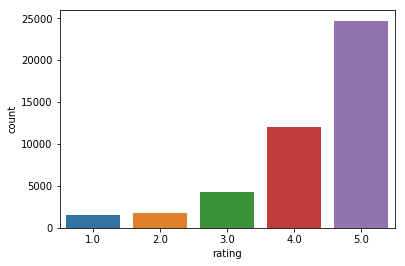

In [10]:
sns.countplot(data = atleast_100_ratings, x = 'rating')

After reducing the density of data, resultant dataframe looks like it's almost representing the overall population data where in more than 50% of the ratings are 5 followed by 4, 3 & 1. Also rating 2 is the least rating given by the users.

In [11]:
atleast_100_ratings.nunique()

userID         289
productID    22635
rating           5
dtype: int64

Overall 22.6K unique products were rated by 289 unique users.

# 7.4. Splitting the data to train & test data sets

In [13]:
train_set, test_set = model_selection.train_test_split(atleast_100_ratings, test_size = 0.30, random_state = 18)

# 7.5. Popularity based recommendation model

In [14]:
# Top 10 products based on number of ratings received
popular = pd.DataFrame(train_set.groupby('productID')['rating'].count().nlargest(train_set['productID'].nunique()))
popular.rename(columns = {'rating':'rating_counts'}, inplace = True)

In [15]:
popular.head(5)

,rating_counts
productID,
B0088CJT4U,55
B003ES5ZUU,41
B000N99BBC,39
B002R5AM7C,38
B004CLYEDC,37


In [16]:
# Defining function for recommending products based on popularity
def recommend(user_id):     
    user_recommendations = popular.head(5)
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [17]:
find_recom = [4425193,1510245,262194]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 4425193

             userID  rating_counts
productID                         
B0088CJT4U  4425193             55
B003ES5ZUU  4425193             41
B000N99BBC  4425193             39
B002R5AM7C  4425193             38
B004CLYEDC  4425193             37


Here is the recommendation for the userId: 1510245

             userID  rating_counts
productID                         
B0088CJT4U  1510245             55
B003ES5ZUU  1510245             41
B000N99BBC  1510245             39
B002R5AM7C  1510245             38
B004CLYEDC  1510245             37


Here is the recommendation for the userId: 262194

            userID  rating_counts
productID                        
B0088CJT4U  262194             55
B003ES5ZUU  262194             41
B000N99BBC  262194             39
B002R5AM7C  262194             38
B004CLYEDC  262194             37




Since the recommendation is based on popularity, and not personalized, recommendation remains same for all the users. This is one of the drawbacks for populaty based recommendation model. All the users may not be interested in buying popular products but definitely be interested in buying that suits their needs, which can be identified based on their own purchases (item-based recommendation) or based on the similar users' interests (user-based recommendation). 

Let's check further by building collaborative filtering that are based on items and users as well.

# 7.6.  Collaborative filtering model

In [25]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(atleast_100_ratings[['userID', 'productID', 'rating']], reader)

In [26]:
trainset, testset = train_test_split(data, test_size = 0.30, random_state = 18)

In [28]:
testset[:5]

[('A3V7D0LH8L7BG0', 'B000YOLUPG', 5.0),
 ('A2WLNSZ9U0T1S3', 'B001ACXHXE', 5.0),
 ('A2W9GX82SLKROQ', 'B003N2POVW', 4.0),
 ('A30XZK10EZN9V4', 'B003E6D9FK', 5.0),
 ('A1ODOGXEYECQQ8', 'B00CJRZ31S', 4.0)]

## 7.6.1. User-based recommendation model

In [29]:
#Defining the model
UserBasedModel = KNNWithMeans(sim_options={'name': 'pearson_baseline', 'user_based': True})

In [30]:
#Fitting the model on train data
UserBasedModel.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [31]:
#Predicting the recommendations on test data
UserBasedPred = UserBasedModel.test(testset)

In [32]:
UserBasedPred

[Prediction(uid='A3V7D0LH8L7BG0', iid='B000YOLUPG', r_ui=5.0, est=4.434426229508197, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2WLNSZ9U0T1S3', iid='B001ACXHXE', r_ui=5.0, est=4.345070422535211, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2W9GX82SLKROQ', iid='B003N2POVW', r_ui=4.0, est=3.935483870967742, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A30XZK10EZN9V4', iid='B003E6D9FK', r_ui=5.0, est=4.275189038971111, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1ODOGXEYECQQ8', iid='B00CJRZ31S', r_ui=4.0, est=4.624357634728344, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid='A3L1VJMHFWONCB', iid='B005UV0964', r_ui=5.0, est=4.275189038971111, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A203OCQQ12MAVT', iid='B0000ET9DG', r_ui=5.0, est=4.275189038971111, details={'was_impossible': True, 'reason': 'User 

In [33]:
print("User-based Model : Test Set")
accuracy.rmse(UserBasedPred, verbose=True)

User-based Model : Test Set
RMSE: 1.0263


1.0263309964469844

In [34]:
trainset.to_raw_iid(10)

'B004NPND20'

In [35]:
UserBasedModel.get_neighbors(iid = 10, k=10)

[130, 277, 42, 239, 211, 212, 199, 57, 208, 60]

In [36]:
trainset.to_raw_iid(1291)

'B00006343P'

In [39]:
#Creating a dataframe for all the predictions and also listing the no. of items rated by the said user (Iu) & 
# no. of ratings the said product received (Ui)
def get_Iu(uid):
    """ return the number of items rated by given user
        uid: the id of the user
        returns: The number of items rated by the user"""
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
        iid: the raw id of the item
        returns: the number of users that have rated the item."""
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(UserBasedPred, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_user_predictions = df.sort_values(by='err')

In [40]:
best_user_predictions.head(10)

,uid,iid,rui,est,details,Iu,Ui,err
1339,AEJAGHLC675A7,B00CHRID4Y,5.0,5.0,"{'actual_k': 2, 'was_impossible': False}",179,3,0.0
6280,A1CMD08Z49PGKQ,B0002L5R78,5.0,5.0,"{'actual_k': 5, 'was_impossible': False}",157,16,0.0
6282,A31N0XY2UTB25C,B00316263Y,5.0,5.0,"{'actual_k': 2, 'was_impossible': False}",161,7,0.0
8288,A3NHUQ33CFH3VM,B00HZWJGS8,5.0,5.0,"{'actual_k': 8, 'was_impossible': False}",136,10,0.0
576,A1E1LEVQ9VQNK,B00E084XRO,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",139,2,0.0
6784,AZMY6E8B52L2T,B00FW6T36Y,5.0,5.0,"{'actual_k': 2, 'was_impossible': False}",121,3,0.0
3508,A2XCCN239AR1XK,B002SZEOLG,5.0,5.0,"{'actual_k': 6, 'was_impossible': False}",64,21,0.0
10865,A2V5M5EJPOD2IU,B003XIJ3MW,5.0,5.0,"{'actual_k': 2, 'was_impossible': False}",88,5,0.0
6774,A19W47CXJJP1MI,B005CWIN1E,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",139,3,0.0
12457,A2WLNSZ9U0T1S3,B001P05NBA,5.0,5.0,"{'actual_k': 3, 'was_impossible': False}",142,6,0.0


In [43]:
print("No. of times the product is reviewed:")
print(sorted(best_user_predictions['Ui'].head(10).unique()))
print("No. of products reviewed by the users listed:")
print(sorted(best_user_predictions['Iu'].head(10).unique()))

No. of times the product is reviewed:
[2, 3, 5, 6, 7, 10, 16, 21]
No. of products reviewed by the users listed:
[64, 88, 121, 136, 139, 142, 157, 161, 179]


If we sort the predictions in ascending order by error, the top 10 predictions can be observed as above. All the items listed in top 10 predictions have the ratings rangin from 2 to 21. And the particular users selected for recommending the prodcuts have already rated products ranging from 64 to 179. C
Considering the products selected that have atleast 100 ratings, the predictions look decent. Let's take further look at worst predictions.

In [32]:
best_user_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12993 entries, 8705 to 11475
Data columns (total 8 columns):
uid        12993 non-null object
iid        12993 non-null object
rui        12993 non-null float64
est        12993 non-null float64
details    12993 non-null object
Iu         12993 non-null int64
Ui         12993 non-null int64
err        12993 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 913.6+ KB


In [33]:
best_user_predictions.tail(10)

,uid,iid,rui,est,details,Iu,Ui,err
156,A2AF0NOCM71J0B,B000VE2RP6,1.0,5.0,"{'actual_k': 2, 'was_impossible': False}",90,6,4.0
11553,A25UZ7MA72SMKM,B003FW0LR2,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",74,3,4.0
10877,A3EXWV8FNSSFL6,B009A6CZ30,1.0,5.0,"{'actual_k': 3, 'was_impossible': False}",203,9,4.0
4483,AZMY6E8B52L2T,B004G6002M,1.0,5.0,"{'actual_k': 4, 'was_impossible': False}",121,10,4.0
812,AGXMC3ITWZASE,B000UV4EUG,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",71,1,4.0
8415,A2W9GX82SLKROQ,B004W2JKWG,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",96,6,4.0
9787,ABVYGB2TKBO8F,B00A659IJI,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",88,1,4.0
6040,A2BLFCOPSMBOZ9,B007ULT422,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",109,1,4.0
7706,AWPODHOB4GFWL,B005L38YX6,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",212,1,4.0
11475,A2V5M5EJPOD2IU,B0038P1TP4,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",89,2,4.0


In [34]:
best_user_predictions['Ui'].tail(10).unique()

array([ 6,  3,  9, 10,  1,  2])

For all worst 10 predictions listed above, there are very less nearest neighbors. We can observe the lower 'k' values in the above list and it is ranging from 1 to 10. The model doesn't have enough data to predict the ratings.

## 7.6.2. Item-based recommendation model

In [45]:
ItemBasedModel = KNNWithMeans(sim_options={'name': 'pearson_baseline', 'user_based': False})

In [46]:
ItemBasedModel.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [47]:
ItemBasedPred = ItemBasedModel.test(testset)

In [48]:
ItemBasedPred

[Prediction(uid='A3V7D0LH8L7BG0', iid='B000YOLUPG', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2WLNSZ9U0T1S3', iid='B001ACXHXE', r_ui=5.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2W9GX82SLKROQ', iid='B003N2POVW', r_ui=4.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A30XZK10EZN9V4', iid='B003E6D9FK', r_ui=5.0, est=4.275189038971111, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1ODOGXEYECQQ8', iid='B00CJRZ31S', r_ui=4.0, est=4.686711255083249, details={'actual_k': 16, 'was_impossible': False}),
 Prediction(uid='A3L1VJMHFWONCB', iid='B005UV0964', r_ui=5.0, est=4.275189038971111, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A203OCQQ12MAVT', iid='B0000ET9DG', r_ui=5.0, est=4.275189038971111, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid=

In [49]:
print("Item-based Model : Test Set")
accuracy.rmse(ItemBasedPred, verbose=True)

Item-based Model : Test Set
RMSE: 1.0767


1.0767220260848729

In [79]:
ItemBasedModel.get_neighbors(iid = 45, k=5)

[1510, 1074, 3234, 777, 3]

In [51]:
trainset.to_raw_iid(45)

'B00F1CRTJM'

In [52]:
trainset.to_raw_iid(1510)

'B000BWACX2'

In [53]:
df1 = pd.DataFrame(ItemBasedPred, columns=['uid', 'iid', 'rui', 'est', 'details'])
df1['Iu'] = df1.uid.apply(get_Iu)
df1['Ui'] = df1.iid.apply(get_Ui)
df1['err'] = abs(df1.est - df1.rui)
best_item_predictions = df1.sort_values(by='err')

In [54]:
best_item_predictions.head(10)

,uid,iid,rui,est,details,Iu,Ui,err
0,A3V7D0LH8L7BG0,B000YOLUPG,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",122,2,0.0
10332,A1ODOGXEYECQQ8,B000ZSUQ9M,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",265,1,0.0
1932,A1URXSRV6WDHVY,B00GO4GMAI,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",80,6,0.0
10331,A2HRHF83I3NDGT,B008R6OPJQ,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",84,5,0.0
1937,A1YEPFLLH42OU1,B00E3W15P0,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",109,9,0.0
4146,A1T1YSCDW0PD25,B00AE09HFA,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",164,1,0.0
10319,A1L64KDYO5BOJA,B000P1O73A,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",80,2,0.0
10316,AZMY6E8B52L2T,B0002LHSFW,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",121,1,0.0
10313,A23ONMGKEWDG4M,B001KBZ3QO,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",78,3,0.0
1945,A3MFORLOKIOEQY,B003NSBLOK,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",65,1,0.0


In [55]:
print("No. of times the product is reviewed:")
print(sorted(best_item_predictions['Ui'].head(10).unique()))
print("No. of products reviewed by the users listed:")
print(sorted(best_item_predictions['Iu'].head(10).unique()))

No. of times the product is reviewed:
[1, 2, 3, 5, 6, 9]
No. of products reviewed by the users listed:
[65, 78, 80, 84, 109, 121, 122, 164, 265]


We can see the best item based predictions in the out[54]. WE can also observe no. of users reviewed reviewed the said product which is ranging from 1 to 9. However, if we see the items reviewed by users, they are quite high ranging from 65 to 265. 

Overall, user based prediction seems better as the error in prediction is lesser than error in item based predictions.
Let's print the top 5 recommended products as per the both user based & item based prediction models.

# 7.7. Recommendation of top 5 products for each user:

In [93]:
from collections import defaultdict

def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.'''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

## 7.7.1. Recommendations based on User based prediction model

In [94]:
top_n = get_top_n(UserBasedPred, n=5)

In [98]:
# Print the recommended items for each user
print("User-User based recommendations:")
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

User-User based recommendations:
A3V7D0LH8L7BG0 ['B00JKM0EQE', 'B0025VKUQQ', 'B001CCLBSA', 'B000FKKWVM', 'B00EVIBN8U']
A2WLNSZ9U0T1S3 ['B00DUTIZJG', 'B001D7REIK', 'B000GA7048', 'B001IEZX3G', 'B001NJ0WCS']
A2W9GX82SLKROQ ['B00F3F0EIU', 'B00829TIEK', 'B000CKVOOY', 'B00004XOM3', 'B0002Y5WXE']
A30XZK10EZN9V4 ['B004ZGLM5W', 'B002V88HFE', 'B001HO59WM', 'B003OC6LWM', 'B006W3ZWXE']
A1ODOGXEYECQQ8 ['B0062EUE54', 'B0011ZCDKS', 'B002MPPHKY', 'B005LESQKG', 'B00JGGUBPI']
A3L1VJMHFWONCB ['B00005T3G0', 'B001MPWMDA', 'B00DTPYRKC', 'B001OZC99U', 'B001PUSERA']
A203OCQQ12MAVT ['B0039BPG1K', 'B003ES5ZR8', 'B003X7TRWE', 'B002PU9SQU', 'B00004W3ZQ']
A3EZFFPVS34AMO ['B000EW9Y4M', 'B007BXD66E', 'B00009R6WT', 'B0082N9BZM', 'B006EKIQYM']
AX05DBU8IRUWY ['B00CUBMF8W', 'B00BXWQTOU', 'B00B9KOCYA', 'B00GPKN498', 'B00CHH0JF0']
A1XXMNLOLKNO0I ['B000053HC5', 'B00CP0I474', 'B008RDI0TU', 'B00B9BUZW2', 'B004YWIJSA']
A36K2N527TXXJN ['B003HHK576', 'B008RDI0TU', 'B00A35WYBA', 'B00K6ZAKCW', 'B002TMRZOQ']
A2PSD2R9A1CXG7 ['B008H

## 7.7.2. Recommendations based on Item based prediction model

In [96]:
top_n_items = get_top_n(ItemBasedPred, n=5)

In [99]:
# Print the recommended items for each user
print("Item-Item based recommendations:")
for uid, user_ratings in top_n_items.items():
    print(uid, [iid for (iid, _) in user_ratings])

Item-Item based recommendations:
A3V7D0LH8L7BG0 ['B000YOLUPG', 'B00006JQ06', 'B00JKM0EQE', 'B0025VKUQQ', 'B00EL8NJ82']
A2WLNSZ9U0T1S3 ['B00001ZWXA', 'B000EVSLRO', 'B000GA7048', 'B00B8KJGY2', 'B001P05NBA']
A2W9GX82SLKROQ ['B0002Y5WXE', 'B004OHX6P6', 'B00D8X0HFE', 'B004U78628', 'B00007GQLS']
A30XZK10EZN9V4 ['B004LVMCMS', 'B004ZGLM5W', 'B001HO59WM', 'B002YWCO7O', 'B004BFXBXI']
A1ODOGXEYECQQ8 ['B000I1ZWRC', 'B005755U0I', 'B00JZAB8OI', 'B005O9YMM4', 'B00CAMCC9I']
A3L1VJMHFWONCB ['B001PUSERA', 'B001MPWMDA', 'B008I646WG', 'B003VAK16O', 'B001OZC99U']
A203OCQQ12MAVT ['B003OBXHPC', 'B000GBN42E', 'B0002D6QJO', 'B003ES5ZR8', 'B00004W3ZQ']
A3EZFFPVS34AMO ['B0033PRWSW', 'B0015MHY6K', 'B0000U1N38', 'B004TS2AP2', 'B0082N9BZM']
AX05DBU8IRUWY ['B001L1H0SC', 'B00J222IJI', 'B003NREDC8', 'B00BXWQTOU', 'B00G56ZNZU']
A1XXMNLOLKNO0I ['B008RDI0TU', 'B00B9BUZW2', 'B0000DK3I4', 'B00007E7K9', 'B0057CVH6W']
A36K2N527TXXJN ['B003HHK576', 'B008RDI0TU', 'B00EZD5AFI', 'B00E08OEGY', 'B00HF9MZZW']
A2PSD2R9A1CXG7 ['B0007

Overall, the RMSE scores under both the models differs slightly. There is no huge difference between the two. However, in general Item-based prediction models are more reliable since there is lot of bias in case of user based models. Users can't be predicted sometimes as the rating given by the users depends on human elements. In case of item based prediction models, recommendations are provided based on the similar items purchased by a certain user. It makes more send to build recommendation model based on or close to user tastes/preferences.

#### User-User based recommendations:
1. A3V7D0LH8L7BG0 ['B00JKM0EQE', 'B0025VKUQQ', 'B001CCLBSA', 'B000FKKWVM', 'B00EVIBN8U']
2. A2WLNSZ9U0T1S3 ['B00DUTIZJG', 'B001D7REIK', 'B000GA7048', 'B001IEZX3G', 'B001NJ0WCS']
3. A2W9GX82SLKROQ ['B00F3F0EIU', 'B00829TIEK', 'B000CKVOOY', 'B00004XOM3', 'B0002Y5WXE']
4. A30XZK10EZN9V4 ['B004ZGLM5W', 'B002V88HFE', 'B001HO59WM', 'B003OC6LWM', 'B006W3ZWXE']
5. A1ODOGXEYECQQ8 ['B0062EUE54', 'B0011ZCDKS', 'B002MPPHKY', 'B005LESQKG', 'B00JGGUBPI']

#### Item-Item based recommendations:
1. A3V7D0LH8L7BG0 ['B000YOLUPG', 'B00006JQ06', 'B00JKM0EQE', 'B0025VKUQQ', 'B00EL8NJ82']
2. A2WLNSZ9U0T1S3 ['B00001ZWXA', 'B000EVSLRO', 'B000GA7048', 'B00B8KJGY2', 'B001P05NBA']
3. A2W9GX82SLKROQ ['B0002Y5WXE', 'B004OHX6P6', 'B00D8X0HFE', 'B004U78628', 'B00007GQLS']
4. A30XZK10EZN9V4 ['B004LVMCMS', 'B004ZGLM5W', 'B001HO59WM', 'B002YWCO7O', 'B004BFXBXI']
5. A1ODOGXEYECQQ8 ['B000I1ZWRC', 'B005755U0I', 'B00JZAB8OI', 'B005O9YMM4', 'B00CAMCC9I']

### In the above recommendations, we can clearly the recommendations are different under the both the models. In case of first user, 2 products 'B00JKM0EQE' & 'B0025VKUQQ' are recommended under both the models. However, for the 2nd user only one product is recommended in common under both the models. Overall, we can freeze on item based recommendation models as they are close to the user tastes/preferences.